The idea with this script is just to have an notebook where we compare everything. I don't intend to change anything in here once this is written, I just want to have a place where all the comparisons are loaded and I can refer to it from Notion. `steered_analysis` was also getting a bit clogged..

Big chunks of this code are lifted from `steered_analysis` and we will use our `gate_functions.py` code as well

# imports and data prep

In [1]:
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt
from MDAnalysis.analysis import distances
import sys

sys.path.insert(1, '../../../string/analysis/scripts')
from gate_functions import *

In [2]:
skip25 = True

No handles with labels found to put in legend.


returning EC gate, IC gate dists


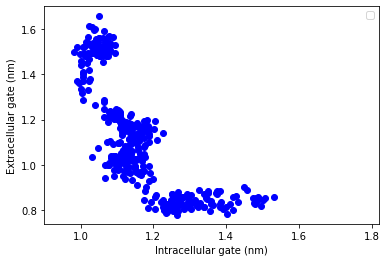

In [3]:
indir = '../../state_by_state_running/targeted_MD/efflux_BFRU_all_heavy'
trajname = 'InOpen-OutOpen'

uni_to_gate_scatter(trajdir=f'{indir}/{trajname}', trajname=trajname, ext = 'skip25.xtc', \
                    uni_top = f'{indir}/{trajname}/IN.start.BFRU.equilbrated.gro', color = 'blue')

In [ ]:
trajdir = '../../state_by_state_running/targeted_MD/efflux_BFRU_all_heavy'
trajname = 'InOpen-InOcc'

## simulation name: [start_ref, end_ref]
if 'BFRU' not in trajdir:
    sim_ref_dict = {"InOpen-InOcc":["IN.start.gro", "IN-OCC.start.gro"],\
                    "InOcc-Occ":["InOpen-InOcc.9600ps.gro", "OCC.start.gro"],\
                    "Occ-OutOcc":["InOcc-Occ.8600ps.gro", "OUT-OCC.start.gro"],\
                    "OutOcc-OutOpen":["Occ-OutOcc.7700ps.gro", "OUT.equilib.200ns.gro"],\
                    "InOcc-OutOcc":["InOpen-InOcc.9600ps.gro", "OUT-OCC.start.gro"],\

                    #influx
                    "OutOpen-OutOcc":["OUT.equilib.200ns.gro", "OUT-OCC.start.gro"],\
                    "OutOcc-Occ":["OutOpen-OutOcc.11200ps.gro", "OCC.start.gro"],\
                    "Occ-InOcc":["OutOcc-Occ.10000ps.gro", "IN-OCC.start.gro"],\
                    "InOcc-InOpen":["Occ-InOcc.8100ps.gro", "IN.start.gro"],\
                    "OutOcc-InOcc":["OutOpen-OutOcc.11200ps.gro", "IN-OCC.start.gro"],\

                    #all 
                   "OutOpen-InOpen":["OUT.equilib.200ns.gro", "IN.start.gro"],\
                    "InOpen-OutOpen":["IN.start.gro", "OUT.equilib.200ns.gro"]}

elif 'BFRU' in trajdir:
    sim_ref_dict = {"InOpen-InOcc":["IN.start.BFRU.equilbrated.gro", "IN-OCC.start.gro"],\
                    "InOcc-Occ":["InOpen-InOcc.10000ps.gro", "OCC.start.gro"],\
                    "Occ-OutOcc":["InOcc-Occ.12980ps.gro", "OUT-OCC.start.gro"],\
                    "OutOcc-OutOpen":["Occ-OutOcc.11700ps.gro", "OUT.equilib.200ns.gro"],\
                    "InOcc-OutOcc":["InOpen-InOcc.10000ps.gro", "OUT-OCC.start.gro"],\

                    #influx
                    "OutOpen-OutOcc":["OUT.equilib.200ns.BFRU.equilibrated.gro", "OUT-OCC.start.gro"],\
                    "OutOcc-Occ":["OutOpen-OutOcc.8500ps.gro", "OCC.start.gro"],
                    "Occ-InOcc":["OutOcc-Occ.10780ps.gro", "IN-OCC.start.gro"],\
                    "InOcc-InOpen":["Occ-InOcc.12630ps.gro", "IN.start.gro"],\
                    "OutOcc-InOcc":["OutOpen-OutOcc.8500ps.gro", "IN-OCC.start.gro"]
                   }

    
start_name = trajname.split('-')[0]
end_name = trajname.split('-')[1]
if skip25:
    u = mda.Universe(f'{trajdir}/{trajname}/{sim_ref_dict[trajname][0]}', f'{trajdir}/{trajname}/{trajname}.skip25.xtc')
else:
    u = mda.Universe(f'{trajdir}/{trajname}/{sim_ref_dict[trajname][0]}', f'{trajdir}/{trajname}/{trajname}.xtc')

start_ref = mda.Universe(f'{trajdir}/{trajname}/{sim_ref_dict[trajname][0]}')
target_str = mda.Universe(f'{trajdir}/{trajname}/{sim_ref_dict[trajname][1]}')